In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

In [2]:
df = pd.read_csv("dataset/train.csv")
df['text'] = df['text'].astype("string")

In [75]:
def borrar_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def limpiar_simbolos(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def borrar_mentions(text):
    mention = re.compile(r'@\S+')
    return mention.sub(r'',text)

def borrar_hashtags(text):
    hashtag = re.compile(r'#\S+')
    return hashtag.sub(r'',text)

def borr_link_mentions(text):
    return borrar_url(borrar_hashtags(text))

def borrar_todo(text):
    return borrar_url(borrar_hashtags(borrar_mentions(text)))

def palabras(text):
    return len(text.split())


2

In [79]:
import warnings
warnings.filterwarnings('ignore')

df['?'] = df.apply(lambda x: borrar_todo(x.text).count('?'),axis=1)
df['!'] = df.apply(lambda x: borrar_todo(x.text).count('!'),axis=1)
df['@'] = df.apply(lambda x: x.text.count('@'),axis=1)
df['#'] = df.apply(lambda x: x.text.count('#'),axis=1)
df['http'] = df.apply(lambda x: 'http' in x.text,axis=1)
df['numeros'] = df.apply(lambda x: sum(c.isdigit() for c in borrar_todo(x.text)),axis=1)
df['palabras_sin_url'] = df.apply(lambda x: palabras(borrar_url(x.text)),axis=1)
df

,id,keyword,location,text,target,numeros,palabras,?,!,@,#,http,palabras_sin_url
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,13,0,0,0,1,False,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,7,0,0,0,0,False,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,22,0,0,0,0,False,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,5,8,0,0,0,1,False,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,16,0,0,0,2,False,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,10,0,0,0,0,True,10
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,20,0,0,2,0,False,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,7,1,0,0,0,True,7
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,19,0,0,0,0,False,19


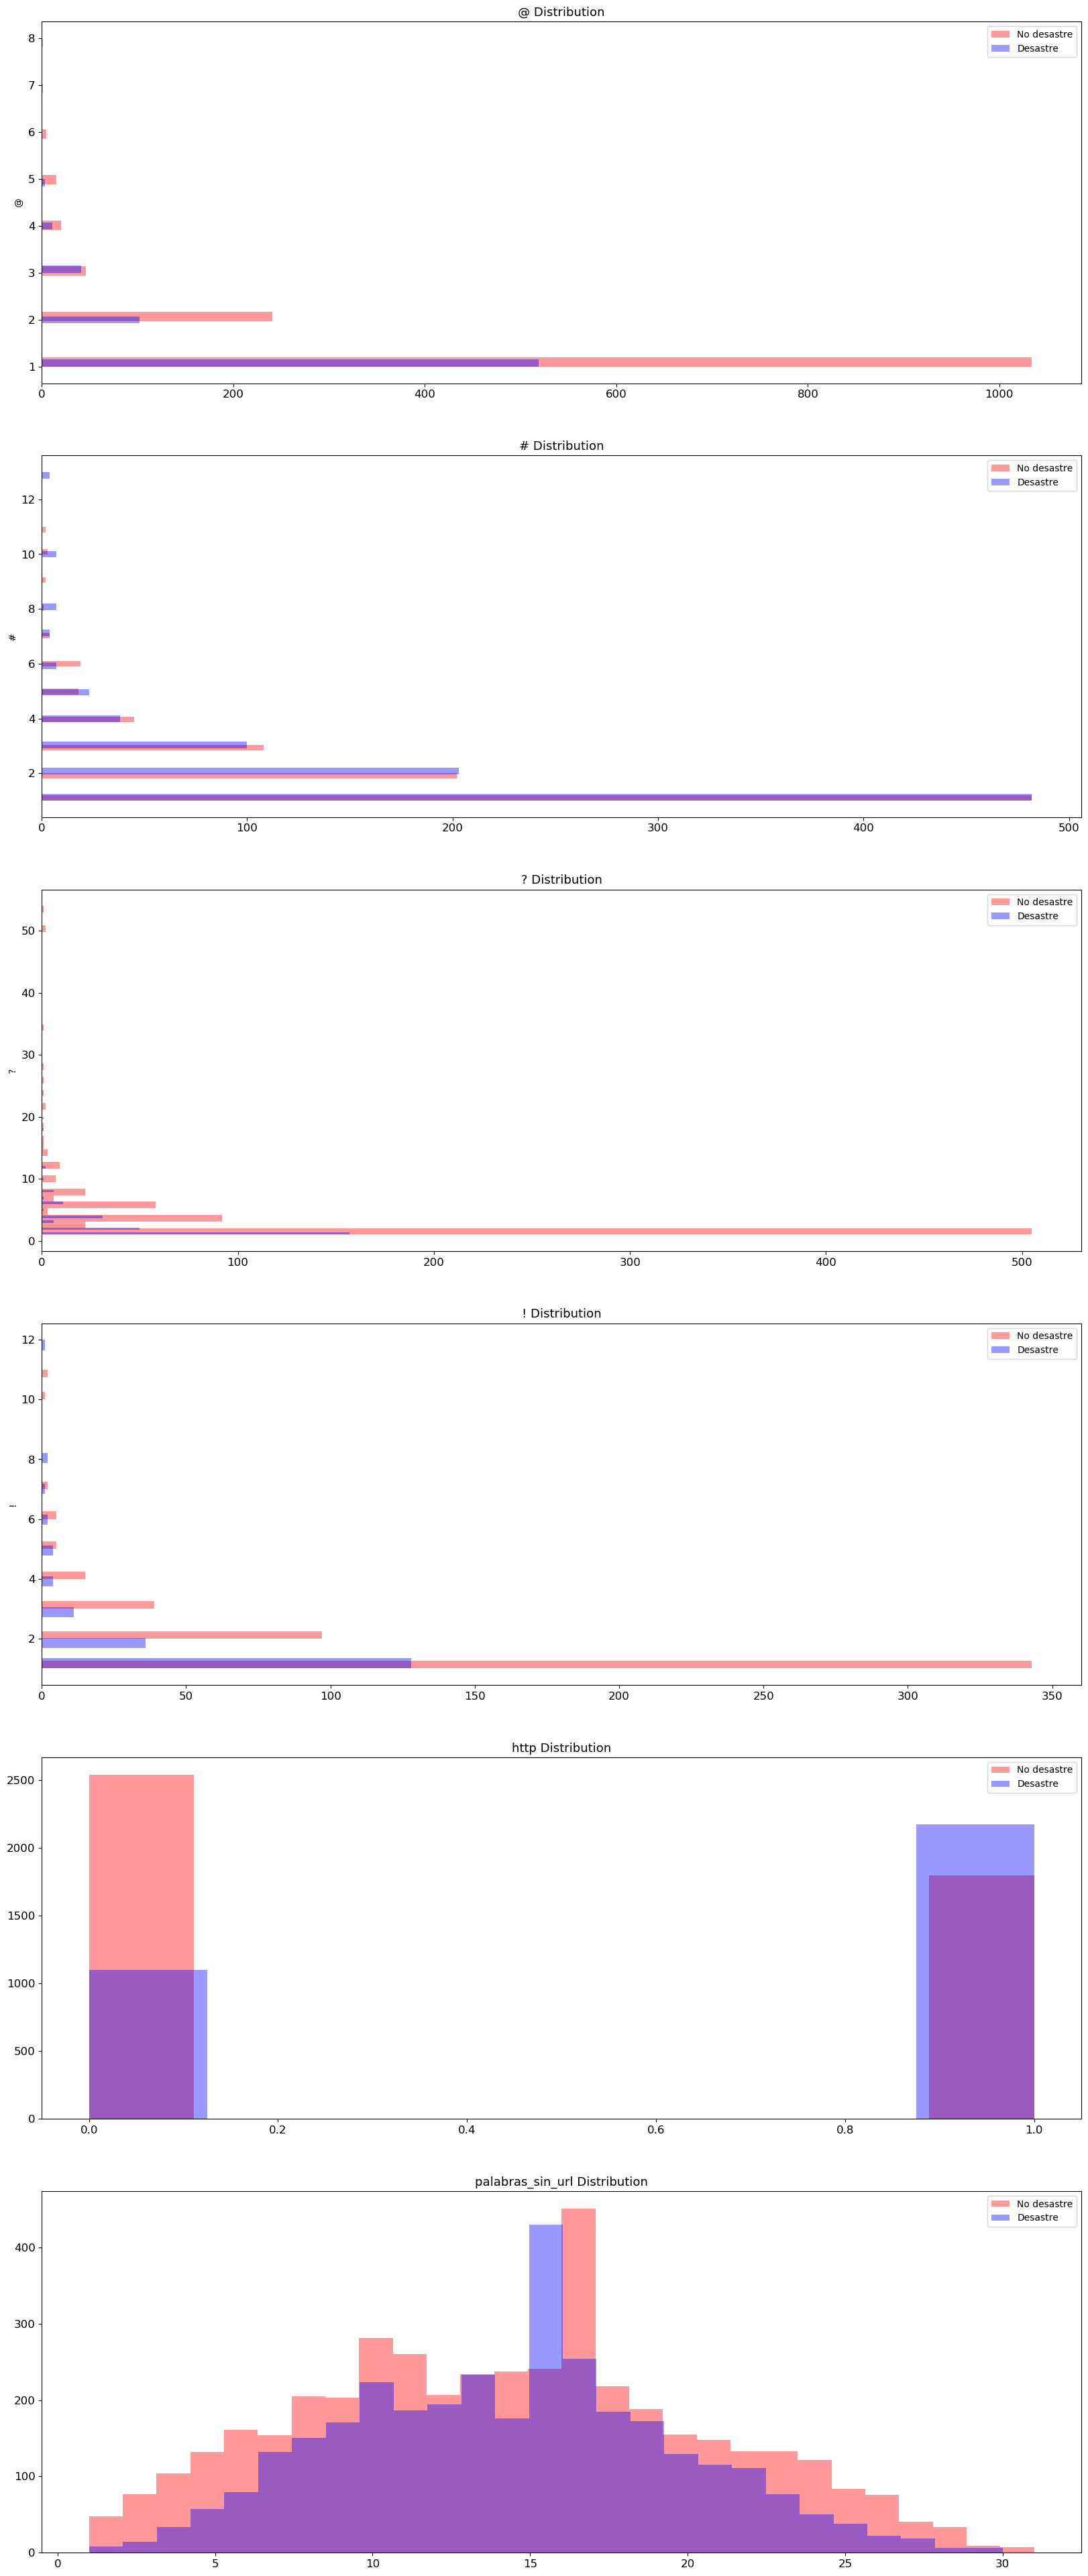

In [132]:
columnas = ['@','#','?','!','http','palabras_sin_url']

verdaderos = (df['target'] == 1)


fig, axes = plt.subplots(ncols=1, nrows=len(columnas), figsize=(20, 50), dpi=100)

for i, columna in enumerate(columnas):
    if columna in '@#?!':
        sns.distplot(df.loc[~verdaderos].loc[df[columna]>0][columna], label='No desastre', ax=axes[i], color='red', kde=0, vertical=True)
        sns.distplot(df.loc[verdaderos].loc[df[columna]>0][columna], label='Desastre', ax=axes[i], color='blue',kde=0, vertical=True)
    else:
        sns.distplot(df.loc[~verdaderos][columna], label='No desastre', ax=axes[i], color='red', kde=0)
        sns.distplot(df.loc[verdaderos][columna], label='Desastre', ax=axes[i], color='blue',kde=0)
        
    
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()
    
    axes[i].set_title(f'{columna} Distribution', fontsize=13)

plt.show()

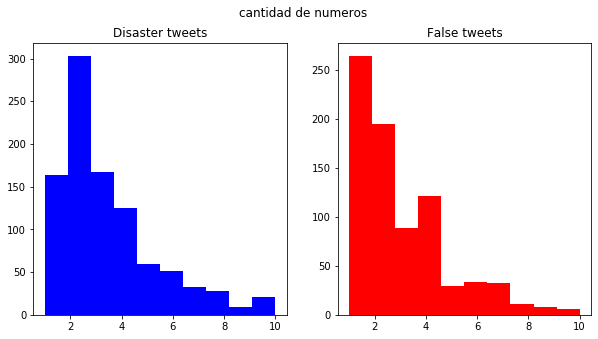

In [81]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dfreal_graph2=df.loc[df['numeros'] > 0].loc[df['target']==1].loc[df['numeros'] < 11]['numeros']
ax1.hist(dfreal_graph2,color='blue',bins=10)
ax1.set_title('Disaster tweets')
dffalso_graph2=df[df['target']==0].loc[df['numeros'] < 11].loc[df['numeros'] > 0]['numeros']
ax2.hist(dffalso_graph2,color='red',bins=10)
ax2.set_title('False tweets')
fig.suptitle('cantidad de numeros')
plt.show()